In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython.display import HTML, Video
from moviepy.editor import VideoFileClip
from PerspectiveTransformation import *
from LaneLines import *
from tqdm import tqdm

In [2]:
images = []
images.append(mpimg.imread('test_images/challenge_video_frame_1.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_100.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_110.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_120.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_130.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_140.jpg'))

In [3]:
images1 = []
images1.append(mpimg.imread('test_images/project_video_frame_1032.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_1048.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_235.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_810.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_551.jpg'))

In [4]:
images2 = []
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_10.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_100.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_200.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_300.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_400.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_500.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_600.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_700.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_800.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_900.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1000.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1100.jpg'))

In [5]:
def plot(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    f = plt.figure(figsize=(24, 9))
    ax1 = f.add_subplot(1, 3, 1)
    ax1.imshow(hls[:,:,0], cmap='gray', vmin=0, vmax=255)
    ax2 = f.add_subplot(1, 3, 2)
    ax2.imshow(hls[:,:,1], cmap='gray', vmin=0, vmax=255)
    ax3 = f.add_subplot(1, 3, 3)
    ax3.imshow(hls[:,:,2], cmap='gray', vmin=0, vmax=255)
    plt.figure()
    plt.imshow(img)

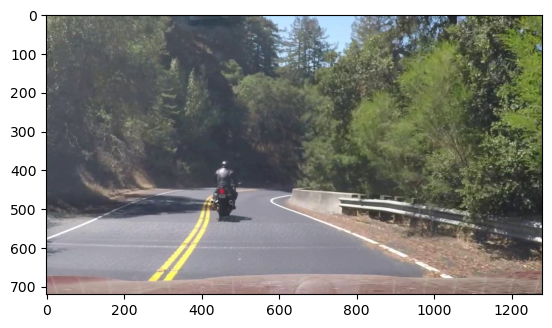

In [6]:
img = images2[2]
birdeye = PerspectiveTransformation()
plt.imshow(img)

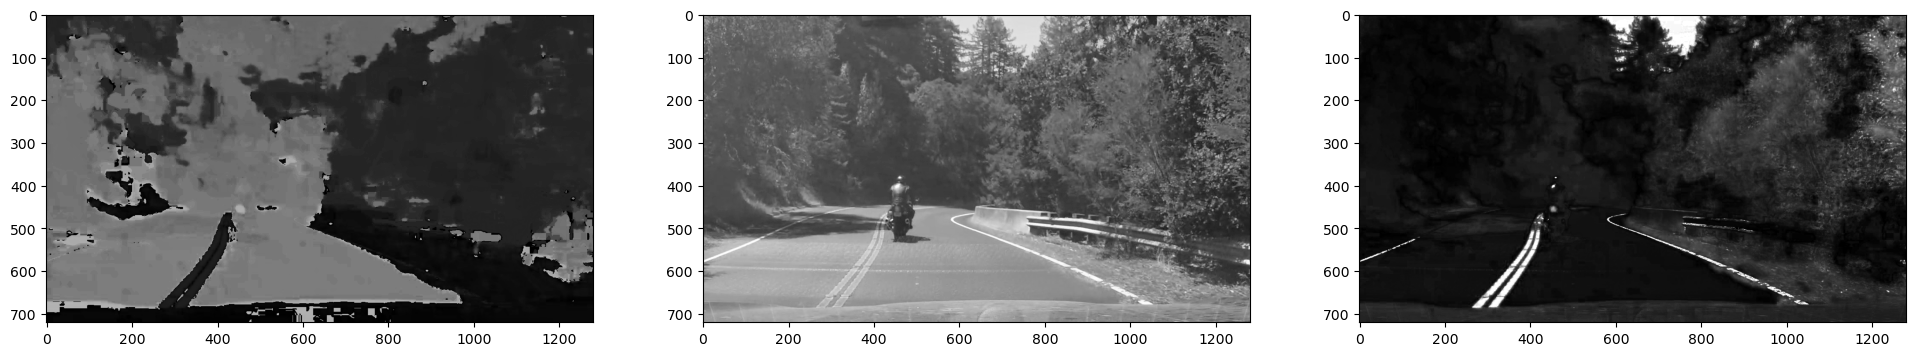

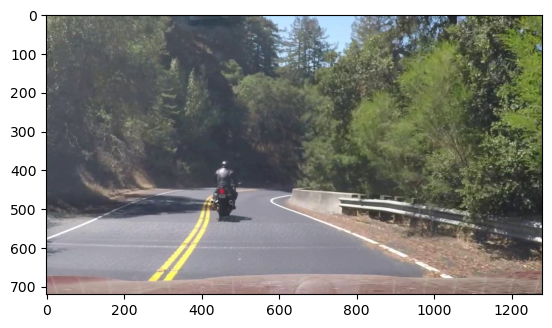

In [7]:
plot(img)

In [8]:
def threshold_rel(img, lo, hi):
    vmin = np.min(img)
    vmax = np.max(img)
    
    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

def threshold_abs(img, lo, hi):
    return np.uint8((img >= lo) & (img <= hi)) * 255

In [9]:
def test(img):
    tmp = birdeye.forward(img)
    tmp = np.copy(img)
    hls = cv2.cvtColor(tmp, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(tmp, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]
    
    f = plt.figure(figsize=(24, 16))
    ax1 = f.add_subplot(2, 2, 1)
    ax1.imshow(tmp)
    ax2 = f.add_subplot(2, 2, 2)
    ax2.imshow(threshold_rel(l_channel, 0.8, 1.0), vmin=0, vmax=255, cmap='gray')
    
    ax3 = f.add_subplot(2, 2, 3)
    ax3.imshow(threshold_rel(s_channel, 0.5, 0.8), vmin=0, vmax=255, cmap='gray')
    
    ax4 = f.add_subplot(2, 2, 4)
    res = threshold_abs(h_channel, 20, 30)
    res &= threshold_rel(v_channel, 0.7, 1.0)
    ax4.imshow(res, vmin=0, vmax=255, cmap='gray')

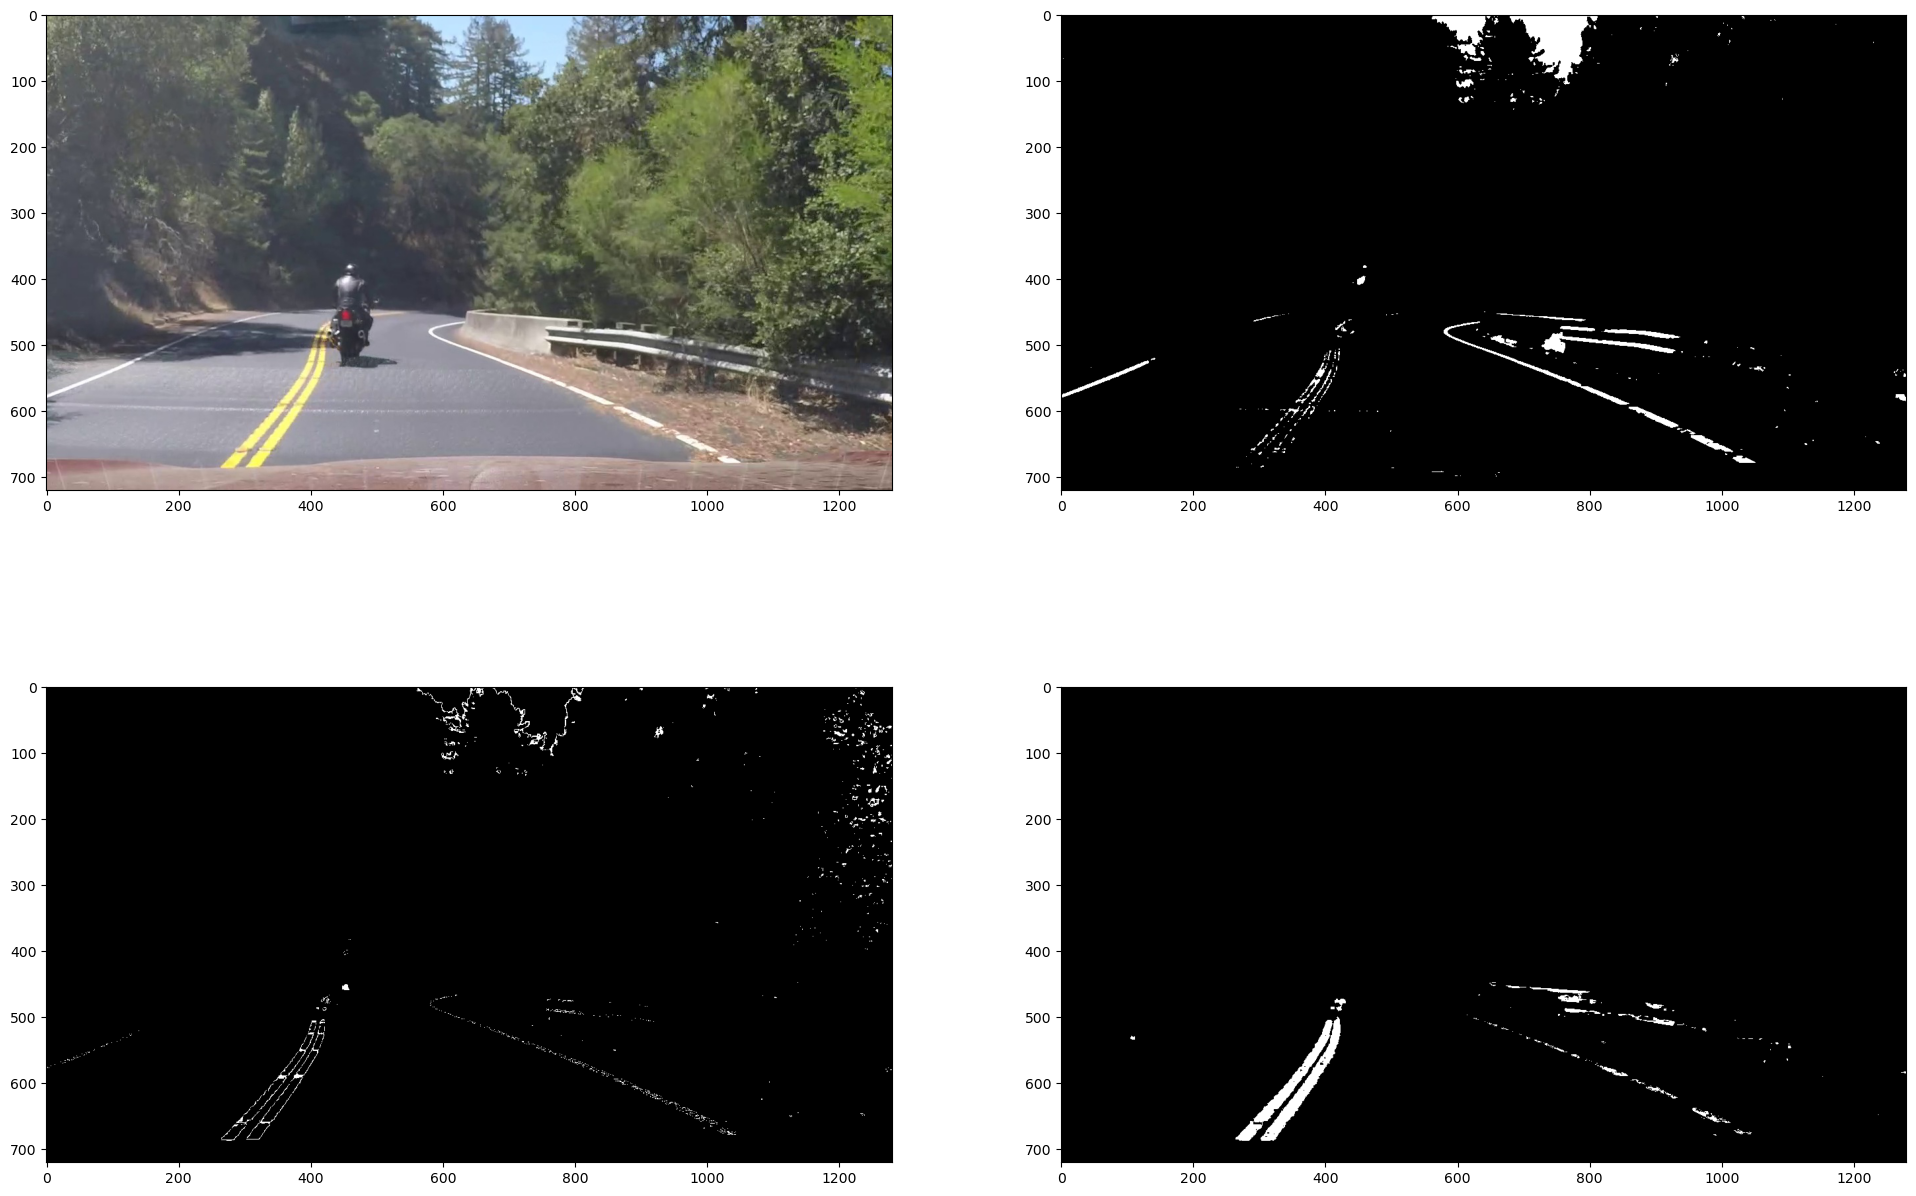

In [10]:
test(images2[2])

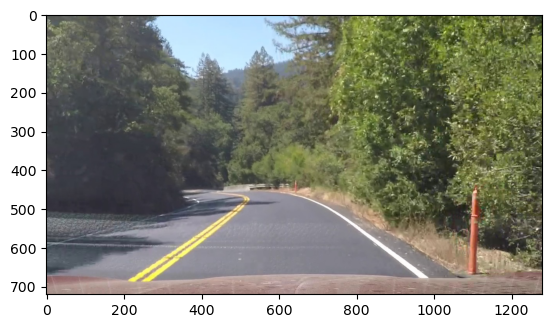

In [11]:
img = images2[1]
plt.imshow(img)

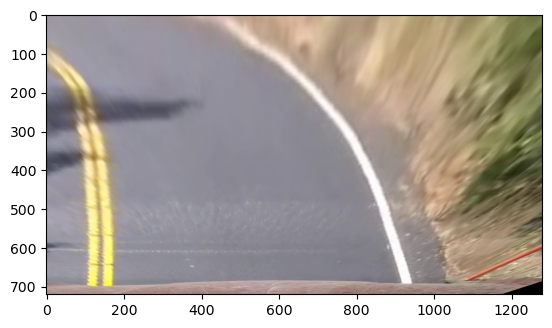

In [12]:
img1 = birdeye.forward(img)
plt.imshow(img1)

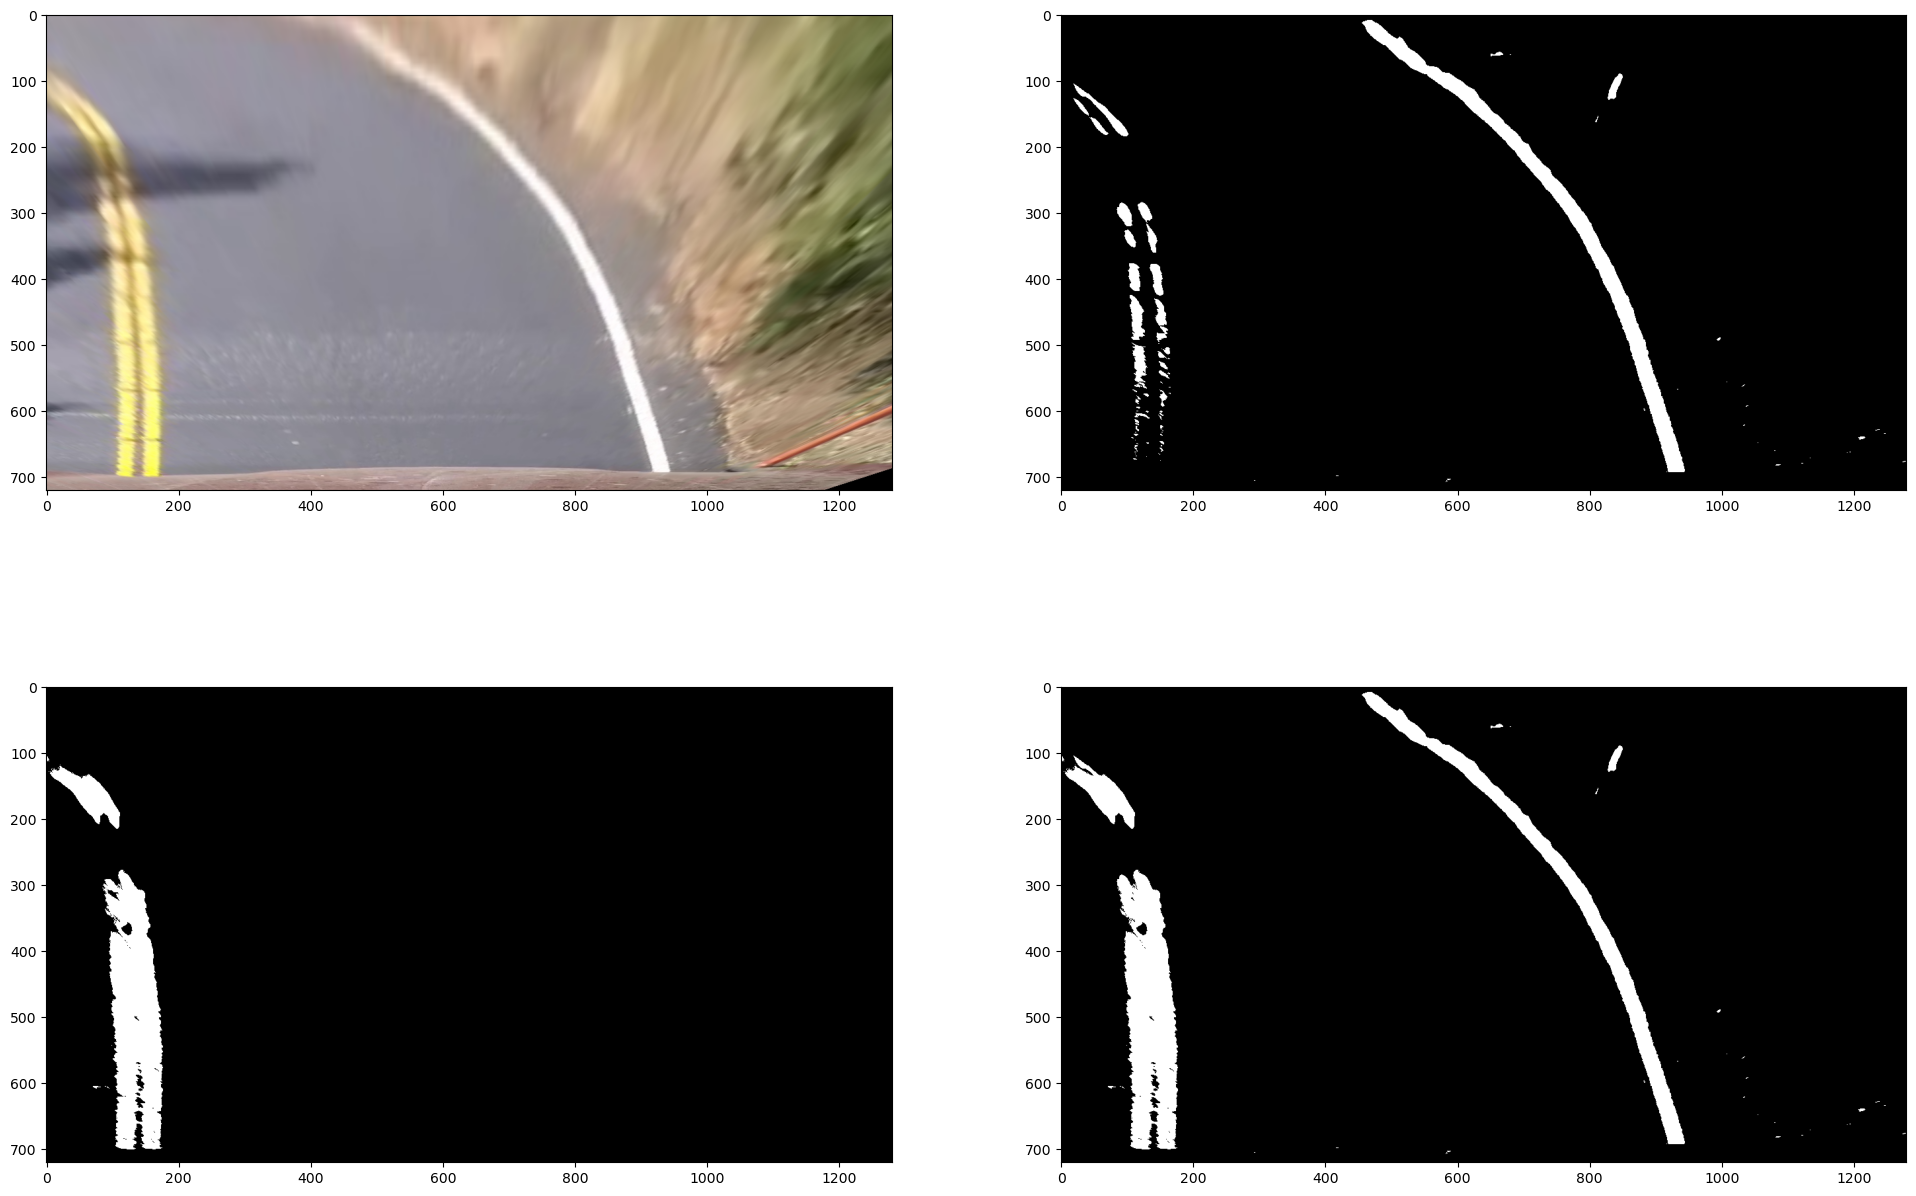

In [13]:
hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(2, 2, 1)
ax1.imshow(img1)
ax2 = f.add_subplot(2, 2, 2)
right_lane = threshold_rel(l_channel, 0.8, 1.0)
# right_lane[:,:750] = 0
ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')

ax3 = f.add_subplot(2, 2, 3)
left_lane = threshold_abs(h_channel, 20, 30)
left_lane &= threshold_rel(v_channel, 0.7, 1.0)
left_lane[:,550:] = 0
ax3.imshow(left_lane, vmin=0, vmax=255, cmap='gray')

img2 = left_lane | right_lane
ax4 = f.add_subplot(2, 2, 4)
ax4.imshow(img2, vmin=0, vmax=255, cmap='gray')

Left lane pixels detected: 30073, Right lane pixels detected: 16429


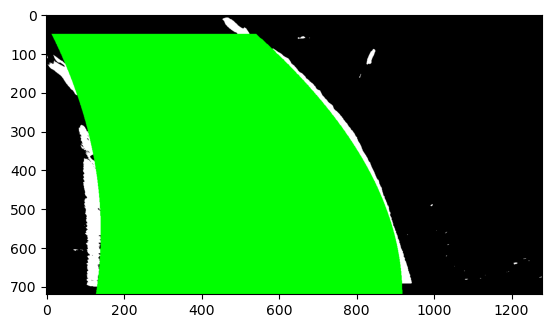

In [14]:
lanelines = LaneLines()
img3 = lanelines.forward(img2)
plt.imshow(img3)

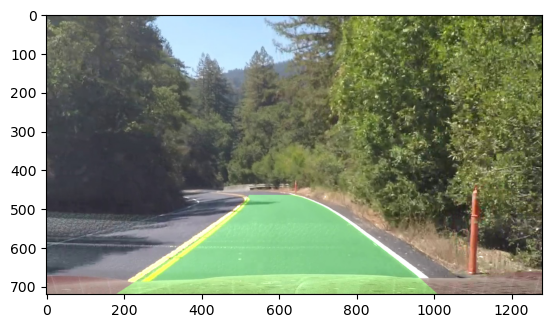

In [15]:
img4 = birdeye.backward(img3)
out_img = cv2.addWeighted(img, 1, img4, 0.3, 0)
plt.imshow(out_img)

In [16]:
birdeye = PerspectiveTransformation()
lanelines = LaneLines()
def process_image(img):
    # step 1
    img1 = birdeye.forward(img)
#     img1 = np.copy(img)
    
    # step 2
    hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]

    right_lane = threshold_rel(l_channel, 0.8, 1.0)
    right_lane[:,:750] = 0

    left_lane = threshold_abs(h_channel, 20, 30)
    left_lane &= threshold_rel(v_channel, 0.7, 1.0)
    left_lane[:,550:] = 0

    img2 = left_lane | right_lane
    
#     img2 = birdeye.forward(img2)
    
    # step 3
    img3 = lanelines.forward(img2)
    
    # step 4
    img4 = birdeye.backward(img3)
    out_img = cv2.addWeighted(img, 1, img4, 1, 0)
    
    return out_img

Left lane pixels detected: 203, Right lane pixels detected: 2034


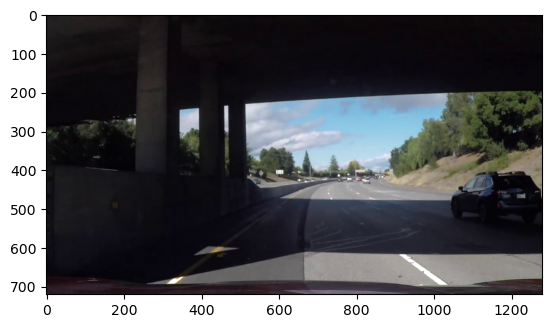

In [17]:
tmp = process_image(images[4])
plt.imshow(tmp)

In [18]:
clip = VideoFileClip("challenge_video.mp4")

In [19]:
Video("challenge_video.mp4")

In [20]:
out_clip = clip.fl_image(process_image)
out_clip.write_videofile("output_videos/tmp.mp4", audio=False)

Left lane pixels detected: 4510, Right lane pixels detected: 1910
Moviepy - Building video output_videos/tmp.mp4.
Moviepy - Writing video output_videos/tmp.mp4



t:   0%|                                                                             | 0/485 [00:00<?, ?it/s, now=None]

Left lane pixels detected: 4510, Right lane pixels detected: 1910


t:   0%|▎                                                                    | 2/485 [00:00<00:34, 14.11it/s, now=None]

Left lane pixels detected: 4550, Right lane pixels detected: 2019


t:   1%|▌                                                                    | 4/485 [00:00<00:49,  9.67it/s, now=None]

Left lane pixels detected: 4608, Right lane pixels detected: 2100
Left lane pixels detected: 4327, Right lane pixels detected: 1702


t:   1%|▊                                                                    | 6/485 [00:00<00:52,  9.21it/s, now=None]

Left lane pixels detected: 4279, Right lane pixels detected: 1142


t:   1%|▉                                                                    | 7/485 [00:00<00:53,  8.96it/s, now=None]

Left lane pixels detected: 5058, Right lane pixels detected: 615


t:   2%|█▏                                                                   | 8/485 [00:00<00:58,  8.14it/s, now=None]

Left lane pixels detected: 8786, Right lane pixels detected: 12693
Left lane pixels detected: 9062, Right lane pixels detected: 64531


t:   2%|█▎                                                                   | 9/485 [00:01<01:13,  6.47it/s, now=None]

Left lane pixels detected: 8049, Right lane pixels detected: 35323


t:   2%|█▍                                                                  | 10/485 [00:01<01:18,  6.07it/s, now=None]

Left lane pixels detected: 7212, Right lane pixels detected: 20382


t:   2%|█▌                                                                  | 11/485 [00:01<01:18,  6.07it/s, now=None]

Left lane pixels detected: 7212, Right lane pixels detected: 22828


t:   2%|█▋                                                                  | 12/485 [00:01<01:19,  5.94it/s, now=None]

Left lane pixels detected: 6291, Right lane pixels detected: 23715


t:   3%|█▉                                                                  | 14/485 [00:01<01:15,  6.23it/s, now=None]

Left lane pixels detected: 6363, Right lane pixels detected: 2970


t:   3%|██                                                                  | 15/485 [00:02<01:12,  6.45it/s, now=None]

Left lane pixels detected: 5472, Right lane pixels detected: 2658


t:   3%|██▏                                                                 | 16/485 [00:02<01:08,  6.81it/s, now=None]

Left lane pixels detected: 4368, Right lane pixels detected: 2337


t:   4%|██▍                                                                 | 17/485 [00:02<01:06,  6.99it/s, now=None]

Left lane pixels detected: 4853, Right lane pixels detected: 2289


t:   4%|██▌                                                                 | 18/485 [00:02<01:03,  7.35it/s, now=None]

Left lane pixels detected: 5827, Right lane pixels detected: 2320


t:   4%|██▋                                                                 | 19/485 [00:02<01:01,  7.64it/s, now=None]

Left lane pixels detected: 4787, Right lane pixels detected: 2048


t:   4%|██▊                                                                 | 20/485 [00:02<01:02,  7.45it/s, now=None]

Left lane pixels detected: 5099, Right lane pixels detected: 2161


t:   4%|██▉                                                                 | 21/485 [00:02<01:01,  7.56it/s, now=None]

Left lane pixels detected: 4576, Right lane pixels detected: 2117


t:   5%|███                                                                 | 22/485 [00:03<00:59,  7.81it/s, now=None]

Left lane pixels detected: 5190, Right lane pixels detected: 2196


t:   5%|███▏                                                                | 23/485 [00:03<01:00,  7.65it/s, now=None]

Left lane pixels detected: 4779, Right lane pixels detected: 1664


t:   5%|███▎                                                                | 24/485 [00:03<01:00,  7.57it/s, now=None]

Left lane pixels detected: 4571, Right lane pixels detected: 1925


t:   5%|███▌                                                                | 25/485 [00:03<01:00,  7.61it/s, now=None]

Left lane pixels detected: 4141, Right lane pixels detected: 1846


t:   5%|███▋                                                                | 26/485 [00:03<01:01,  7.47it/s, now=None]

Left lane pixels detected: 3584, Right lane pixels detected: 1532


t:   6%|███▊                                                                | 27/485 [00:03<01:00,  7.62it/s, now=None]

Left lane pixels detected: 5019, Right lane pixels detected: 2770


t:   6%|███▉                                                                | 28/485 [00:03<01:01,  7.39it/s, now=None]

Left lane pixels detected: 4882, Right lane pixels detected: 2648


t:   6%|████                                                                | 29/485 [00:03<01:02,  7.31it/s, now=None]

Left lane pixels detected: 4912, Right lane pixels detected: 2711


t:   6%|████▏                                                               | 30/485 [00:04<01:04,  7.00it/s, now=None]

Left lane pixels detected: 5191, Right lane pixels detected: 2860


t:   6%|████▎                                                               | 31/485 [00:04<01:05,  6.90it/s, now=None]

Left lane pixels detected: 5749, Right lane pixels detected: 3256


t:   7%|████▍                                                               | 32/485 [00:04<01:06,  6.85it/s, now=None]

Left lane pixels detected: 3399, Right lane pixels detected: 2995


t:   7%|████▋                                                               | 33/485 [00:04<01:07,  6.72it/s, now=None]

Left lane pixels detected: 3797, Right lane pixels detected: 2644


t:   7%|████▊                                                               | 34/485 [00:04<01:06,  6.77it/s, now=None]

Left lane pixels detected: 2934, Right lane pixels detected: 2613


t:   7%|████▉                                                               | 35/485 [00:04<01:05,  6.88it/s, now=None]

Left lane pixels detected: 4903, Right lane pixels detected: 1563
Left lane pixels detected: 5452, Right lane pixels detected: 2173


t:   8%|█████▏                                                              | 37/485 [00:05<01:04,  6.92it/s, now=None]

Left lane pixels detected: 5001, Right lane pixels detected: 2072


t:   8%|█████▎                                                              | 38/485 [00:05<01:03,  7.06it/s, now=None]

Left lane pixels detected: 4204, Right lane pixels detected: 2218


t:   8%|█████▍                                                              | 39/485 [00:05<01:00,  7.40it/s, now=None]

Left lane pixels detected: 3673, Right lane pixels detected: 1848


t:   8%|█████▌                                                              | 40/485 [00:05<00:59,  7.47it/s, now=None]

Left lane pixels detected: 3435, Right lane pixels detected: 1597


t:   8%|█████▋                                                              | 41/485 [00:05<00:56,  7.81it/s, now=None]

Left lane pixels detected: 4005, Right lane pixels detected: 1863


t:   9%|█████▉                                                              | 42/485 [00:05<00:58,  7.52it/s, now=None]

Left lane pixels detected: 3993, Right lane pixels detected: 2125


t:   9%|██████                                                              | 43/485 [00:05<00:59,  7.47it/s, now=None]

Left lane pixels detected: 3400, Right lane pixels detected: 2331


t:   9%|██████▏                                                             | 44/485 [00:06<00:59,  7.47it/s, now=None]

Left lane pixels detected: 3132, Right lane pixels detected: 2575


t:   9%|██████▎                                                             | 45/485 [00:06<00:57,  7.68it/s, now=None]

Left lane pixels detected: 2848, Right lane pixels detected: 2483


t:   9%|██████▍                                                             | 46/485 [00:06<00:57,  7.69it/s, now=None]

Left lane pixels detected: 2713, Right lane pixels detected: 2569


t:  10%|██████▌                                                             | 47/485 [00:06<00:58,  7.45it/s, now=None]

Left lane pixels detected: 3223, Right lane pixels detected: 2946


t:  10%|██████▋                                                             | 48/485 [00:06<00:59,  7.35it/s, now=None]

Left lane pixels detected: 4001, Right lane pixels detected: 2255


t:  10%|██████▊                                                             | 49/485 [00:06<00:57,  7.54it/s, now=None]

Left lane pixels detected: 3605, Right lane pixels detected: 1875


t:  10%|███████                                                             | 50/485 [00:06<00:56,  7.65it/s, now=None]

Left lane pixels detected: 2970, Right lane pixels detected: 1415


t:  11%|███████▏                                                            | 51/485 [00:06<00:58,  7.43it/s, now=None]

Left lane pixels detected: 4129, Right lane pixels detected: 1906


t:  11%|███████▎                                                            | 52/485 [00:07<00:58,  7.41it/s, now=None]

Left lane pixels detected: 4127, Right lane pixels detected: 2171


t:  11%|███████▍                                                            | 53/485 [00:07<00:56,  7.69it/s, now=None]

Left lane pixels detected: 3054, Right lane pixels detected: 1784


t:  11%|███████▌                                                            | 54/485 [00:07<00:53,  8.01it/s, now=None]

Left lane pixels detected: 3187, Right lane pixels detected: 2141


t:  11%|███████▋                                                            | 55/485 [00:07<00:53,  8.08it/s, now=None]

Left lane pixels detected: 4448, Right lane pixels detected: 2690


t:  12%|███████▊                                                            | 56/485 [00:07<00:54,  7.88it/s, now=None]

Left lane pixels detected: 4073, Right lane pixels detected: 2684


t:  12%|███████▉                                                            | 57/485 [00:07<00:53,  8.00it/s, now=None]

Left lane pixels detected: 3788, Right lane pixels detected: 2743


t:  12%|████████▏                                                           | 58/485 [00:07<00:55,  7.75it/s, now=None]

Left lane pixels detected: 3644, Right lane pixels detected: 2902


t:  12%|████████▎                                                           | 59/485 [00:08<00:56,  7.58it/s, now=None]

Left lane pixels detected: 3008, Right lane pixels detected: 2644


t:  12%|████████▍                                                           | 60/485 [00:08<01:01,  6.91it/s, now=None]

Left lane pixels detected: 3093, Right lane pixels detected: 2953


t:  13%|████████▌                                                           | 61/485 [00:08<01:03,  6.63it/s, now=None]

Left lane pixels detected: 2529, Right lane pixels detected: 2727
Left lane pixels detected: 2613, Right lane pixels detected: 2368


t:  13%|████████▊                                                           | 63/485 [00:08<01:04,  6.49it/s, now=None]

Left lane pixels detected: 2864, Right lane pixels detected: 2282


t:  13%|████████▉                                                           | 64/485 [00:08<01:02,  6.74it/s, now=None]

Left lane pixels detected: 3707, Right lane pixels detected: 1979


t:  13%|█████████                                                           | 65/485 [00:08<01:01,  6.79it/s, now=None]

Left lane pixels detected: 5332, Right lane pixels detected: 2388


t:  14%|█████████▎                                                          | 66/485 [00:09<01:02,  6.75it/s, now=None]

Left lane pixels detected: 4947, Right lane pixels detected: 2462


t:  14%|█████████▍                                                          | 67/485 [00:09<01:00,  6.86it/s, now=None]

Left lane pixels detected: 4705, Right lane pixels detected: 2451


t:  14%|█████████▌                                                          | 68/485 [00:09<01:02,  6.66it/s, now=None]

Left lane pixels detected: 4268, Right lane pixels detected: 2311


t:  14%|█████████▋                                                          | 69/485 [00:09<01:01,  6.81it/s, now=None]

Left lane pixels detected: 2980, Right lane pixels detected: 1945


t:  14%|█████████▊                                                          | 70/485 [00:09<00:59,  7.00it/s, now=None]

Left lane pixels detected: 2586, Right lane pixels detected: 2389


t:  15%|█████████▉                                                          | 71/485 [00:09<01:00,  6.81it/s, now=None]

Left lane pixels detected: 3118, Right lane pixels detected: 2524


t:  15%|██████████                                                          | 72/485 [00:09<01:00,  6.85it/s, now=None]

Left lane pixels detected: 3029, Right lane pixels detected: 2724


t:  15%|██████████▏                                                         | 73/485 [00:10<01:01,  6.73it/s, now=None]

Left lane pixels detected: 3035, Right lane pixels detected: 2985


t:  15%|██████████▍                                                         | 74/485 [00:10<00:59,  6.89it/s, now=None]

Left lane pixels detected: 3049, Right lane pixels detected: 2986


t:  15%|██████████▌                                                         | 75/485 [00:10<00:59,  6.86it/s, now=None]

Left lane pixels detected: 2866, Right lane pixels detected: 3293


t:  16%|██████████▋                                                         | 76/485 [00:10<01:00,  6.79it/s, now=None]

Left lane pixels detected: 2773, Right lane pixels detected: 2830


t:  16%|██████████▊                                                         | 77/485 [00:10<00:59,  6.87it/s, now=None]

Left lane pixels detected: 2252, Right lane pixels detected: 2269


t:  16%|██████████▉                                                         | 78/485 [00:10<00:57,  7.02it/s, now=None]

Left lane pixels detected: 2132, Right lane pixels detected: 1800


t:  16%|███████████                                                         | 79/485 [00:10<00:56,  7.14it/s, now=None]

Left lane pixels detected: 2676, Right lane pixels detected: 2161


t:  16%|███████████▏                                                        | 80/485 [00:11<00:56,  7.13it/s, now=None]

Left lane pixels detected: 2280, Right lane pixels detected: 2257


t:  17%|███████████▎                                                        | 81/485 [00:11<00:56,  7.13it/s, now=None]

Left lane pixels detected: 2636, Right lane pixels detected: 2324


t:  17%|███████████▍                                                        | 82/485 [00:11<00:56,  7.11it/s, now=None]

Left lane pixels detected: 2513, Right lane pixels detected: 2389


t:  17%|███████████▋                                                        | 83/485 [00:11<00:57,  6.95it/s, now=None]

Left lane pixels detected: 2103, Right lane pixels detected: 2335


t:  17%|███████████▊                                                        | 84/485 [00:11<00:57,  6.97it/s, now=None]

Left lane pixels detected: 2895, Right lane pixels detected: 2868


t:  18%|███████████▉                                                        | 85/485 [00:11<00:55,  7.22it/s, now=None]

Left lane pixels detected: 3019, Right lane pixels detected: 2883
Left lane pixels detected: 2869, Right lane pixels detected: 2994


t:  18%|████████████▏                                                       | 87/485 [00:12<00:58,  6.80it/s, now=None]

Left lane pixels detected: 2403, Right lane pixels detected: 2952
Left lane pixels detected: 2624, Right lane pixels detected: 3318


t:  18%|████████████▎                                                       | 88/485 [00:12<00:59,  6.65it/s, now=None]

Left lane pixels detected: 2206, Right lane pixels detected: 3038


t:  19%|████████████▌                                                       | 90/485 [00:12<00:59,  6.64it/s, now=None]

Left lane pixels detected: 1873, Right lane pixels detected: 2440


t:  19%|████████████▊                                                       | 91/485 [00:12<00:57,  6.82it/s, now=None]

Left lane pixels detected: 2050, Right lane pixels detected: 1951


t:  19%|████████████▉                                                       | 92/485 [00:12<00:57,  6.85it/s, now=None]

Left lane pixels detected: 2505, Right lane pixels detected: 1838


t:  19%|█████████████                                                       | 93/485 [00:13<00:57,  6.77it/s, now=None]

Left lane pixels detected: 3769, Right lane pixels detected: 2705


t:  19%|█████████████▏                                                      | 94/485 [00:13<00:56,  6.97it/s, now=None]

Left lane pixels detected: 2787, Right lane pixels detected: 2015


t:  20%|█████████████▎                                                      | 95/485 [00:13<00:56,  6.92it/s, now=None]

Left lane pixels detected: 2753, Right lane pixels detected: 2144


t:  20%|█████████████▍                                                      | 96/485 [00:13<00:57,  6.80it/s, now=None]

Left lane pixels detected: 2762, Right lane pixels detected: 2270


t:  20%|█████████████▌                                                      | 97/485 [00:13<00:58,  6.67it/s, now=None]

Left lane pixels detected: 4399, Right lane pixels detected: 2958


t:  20%|█████████████▋                                                      | 98/485 [00:13<00:57,  6.75it/s, now=None]

Left lane pixels detected: 3569, Right lane pixels detected: 2694
Left lane pixels detected: 3058, Right lane pixels detected: 2816


t:  21%|█████████████▊                                                     | 100/485 [00:14<00:57,  6.74it/s, now=None]

Left lane pixels detected: 2667, Right lane pixels detected: 2685


t:  21%|█████████████▉                                                     | 101/485 [00:14<00:56,  6.82it/s, now=None]

Left lane pixels detected: 2499, Right lane pixels detected: 2602


t:  21%|██████████████                                                     | 102/485 [00:14<00:56,  6.82it/s, now=None]

Left lane pixels detected: 3549, Right lane pixels detected: 3225


t:  21%|██████████████▏                                                    | 103/485 [00:14<00:57,  6.64it/s, now=None]

Left lane pixels detected: 3695, Right lane pixels detected: 3320


t:  21%|██████████████▎                                                    | 104/485 [00:14<00:56,  6.76it/s, now=None]

Left lane pixels detected: 2659, Right lane pixels detected: 2572


t:  22%|██████████████▌                                                    | 105/485 [00:14<00:55,  6.84it/s, now=None]

Left lane pixels detected: 3946, Right lane pixels detected: 2717


t:  22%|██████████████▋                                                    | 106/485 [00:14<00:54,  6.94it/s, now=None]

Left lane pixels detected: 3795, Right lane pixels detected: 1921


t:  22%|██████████████▊                                                    | 107/485 [00:15<00:52,  7.20it/s, now=None]

Left lane pixels detected: 5842, Right lane pixels detected: 2701


t:  22%|██████████████▉                                                    | 108/485 [00:15<00:52,  7.25it/s, now=None]

Left lane pixels detected: 4249, Right lane pixels detected: 2397


t:  22%|███████████████                                                    | 109/485 [00:15<00:52,  7.17it/s, now=None]

Left lane pixels detected: 4902, Right lane pixels detected: 2578


t:  23%|███████████████▏                                                   | 110/485 [00:15<00:54,  6.88it/s, now=None]

Left lane pixels detected: 4570, Right lane pixels detected: 2340


t:  23%|███████████████▎                                                   | 111/485 [00:15<00:54,  6.84it/s, now=None]

Left lane pixels detected: 5644, Right lane pixels detected: 2535


t:  23%|███████████████▍                                                   | 112/485 [00:15<00:52,  7.04it/s, now=None]

Left lane pixels detected: 5234, Right lane pixels detected: 2709


t:  23%|███████████████▌                                                   | 113/485 [00:15<00:53,  6.93it/s, now=None]

Left lane pixels detected: 4715, Right lane pixels detected: 2604


t:  24%|███████████████▋                                                   | 114/485 [00:16<00:52,  7.09it/s, now=None]

Left lane pixels detected: 4438, Right lane pixels detected: 2604


t:  24%|███████████████▉                                                   | 115/485 [00:16<00:53,  6.92it/s, now=None]

Left lane pixels detected: 3676, Right lane pixels detected: 2492


t:  24%|████████████████                                                   | 116/485 [00:16<00:55,  6.66it/s, now=None]

Left lane pixels detected: 4385, Right lane pixels detected: 3030


t:  24%|████████████████▏                                                  | 117/485 [00:16<00:53,  6.92it/s, now=None]

Left lane pixels detected: 5000, Right lane pixels detected: 3130
Left lane pixels detected: 4938, Right lane pixels detected: 2579


t:  25%|████████████████▍                                                  | 119/485 [00:16<00:52,  6.92it/s, now=None]

Left lane pixels detected: 4065, Right lane pixels detected: 1768


t:  25%|████████████████▌                                                  | 120/485 [00:16<00:52,  6.98it/s, now=None]

Left lane pixels detected: 4297, Right lane pixels detected: 1518


t:  25%|████████████████▋                                                  | 121/485 [00:17<00:53,  6.85it/s, now=None]

Left lane pixels detected: 4200, Right lane pixels detected: 1708


t:  25%|████████████████▊                                                  | 122/485 [00:17<00:53,  6.83it/s, now=None]

Left lane pixels detected: 3931, Right lane pixels detected: 1950


t:  25%|████████████████▉                                                  | 123/485 [00:17<00:52,  6.92it/s, now=None]

Left lane pixels detected: 3523, Right lane pixels detected: 1839


t:  26%|█████████████████▏                                                 | 124/485 [00:17<00:52,  6.93it/s, now=None]

Left lane pixels detected: 3786, Right lane pixels detected: 1966


t:  26%|█████████████████▎                                                 | 125/485 [00:17<00:52,  6.87it/s, now=None]

Left lane pixels detected: 3476, Right lane pixels detected: 1945


t:  26%|█████████████████▍                                                 | 126/485 [00:17<00:49,  7.21it/s, now=None]

Left lane pixels detected: 2873, Right lane pixels detected: 1878


t:  26%|█████████████████▌                                                 | 127/485 [00:17<00:49,  7.23it/s, now=None]

Left lane pixels detected: 2617, Right lane pixels detected: 2027


t:  26%|█████████████████▋                                                 | 128/485 [00:18<00:50,  7.03it/s, now=None]

Left lane pixels detected: 2261, Right lane pixels detected: 2141


t:  27%|█████████████████▊                                                 | 129/485 [00:18<00:50,  7.06it/s, now=None]

Left lane pixels detected: 1883, Right lane pixels detected: 2171


t:  27%|█████████████████▉                                                 | 130/485 [00:18<00:51,  6.90it/s, now=None]

Left lane pixels detected: 1364, Right lane pixels detected: 2298


t:  27%|██████████████████                                                 | 131/485 [00:18<00:50,  6.97it/s, now=None]

Left lane pixels detected: 782, Right lane pixels detected: 2259


t:  27%|██████████████████▏                                                | 132/485 [00:18<00:51,  6.86it/s, now=None]

Left lane pixels detected: 199, Right lane pixels detected: 1990


t:  27%|██████████████████▎                                                | 133/485 [00:18<00:51,  6.90it/s, now=None]

Left lane pixels detected: 9, Right lane pixels detected: 1217


t:  28%|██████████████████▌                                                | 134/485 [00:18<00:51,  6.84it/s, now=None]

Left lane pixels detected: 185, Right lane pixels detected: 2403


t:  28%|██████████████████▋                                                | 135/485 [00:19<00:49,  7.13it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 337


t:  28%|██████████████████▊                                                | 136/485 [00:19<00:49,  7.09it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 692


t:  28%|██████████████████▉                                                | 137/485 [00:19<00:50,  6.87it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 802


t:  28%|███████████████████                                                | 138/485 [00:19<00:48,  7.16it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 502


t:  29%|███████████████████▏                                               | 139/485 [00:19<00:47,  7.33it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 215


t:  29%|███████████████████▎                                               | 140/485 [00:19<00:44,  7.75it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 348


t:  29%|███████████████████▍                                               | 141/485 [00:19<00:48,  7.08it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 566


t:  29%|███████████████████▌                                               | 142/485 [00:20<00:48,  7.09it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 330


t:  29%|███████████████████▊                                               | 143/485 [00:20<00:50,  6.80it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 432


t:  30%|███████████████████▉                                               | 144/485 [00:20<00:49,  6.95it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 3487


t:  30%|████████████████████                                               | 145/485 [00:20<00:48,  6.95it/s, now=None]

Left lane pixels detected: 0, Right lane pixels detected: 3360
Left lane pixels detected: 3644, Right lane pixels detected: 3711


t:  30%|████████████████████▎                                              | 147/485 [00:20<00:49,  6.90it/s, now=None]

Left lane pixels detected: 3541, Right lane pixels detected: 4109


t:  31%|████████████████████▍                                              | 148/485 [00:20<00:46,  7.31it/s, now=None]

Left lane pixels detected: 4577, Right lane pixels detected: 4185


t:  31%|████████████████████▌                                              | 149/485 [00:21<00:45,  7.31it/s, now=None]

Left lane pixels detected: 4327, Right lane pixels detected: 4689


t:  31%|████████████████████▋                                              | 150/485 [00:21<00:46,  7.20it/s, now=None]

Left lane pixels detected: 3916, Right lane pixels detected: 4974


t:  31%|████████████████████▊                                              | 151/485 [00:21<00:46,  7.25it/s, now=None]

Left lane pixels detected: 4889, Right lane pixels detected: 5010


t:  31%|████████████████████▉                                              | 152/485 [00:21<00:46,  7.13it/s, now=None]

Left lane pixels detected: 7954, Right lane pixels detected: 4284


t:  32%|█████████████████████▏                                             | 153/485 [00:21<00:47,  6.93it/s, now=None]

Left lane pixels detected: 7974, Right lane pixels detected: 4303


t:  32%|█████████████████████▎                                             | 154/485 [00:21<00:47,  6.96it/s, now=None]

Left lane pixels detected: 8685, Right lane pixels detected: 4500


t:  32%|█████████████████████▍                                             | 155/485 [00:21<00:49,  6.67it/s, now=None]

Left lane pixels detected: 9061, Right lane pixels detected: 4397


t:  32%|█████████████████████▌                                             | 156/485 [00:22<00:48,  6.77it/s, now=None]

Left lane pixels detected: 9526, Right lane pixels detected: 4497


t:  32%|█████████████████████▋                                             | 157/485 [00:22<00:48,  6.74it/s, now=None]

Left lane pixels detected: 9405, Right lane pixels detected: 4711
Left lane pixels detected: 8200, Right lane pixels detected: 5069


t:  33%|█████████████████████▉                                             | 159/485 [00:22<00:48,  6.69it/s, now=None]

Left lane pixels detected: 7240, Right lane pixels detected: 5403


t:  33%|██████████████████████                                             | 160/485 [00:22<00:48,  6.75it/s, now=None]

Left lane pixels detected: 9792, Right lane pixels detected: 5025


t:  33%|██████████████████████▏                                            | 161/485 [00:22<00:47,  6.77it/s, now=None]

Left lane pixels detected: 7692, Right lane pixels detected: 4697


t:  33%|██████████████████████▍                                            | 162/485 [00:22<00:47,  6.85it/s, now=None]

Left lane pixels detected: 7189, Right lane pixels detected: 3900


t:  34%|██████████████████████▌                                            | 163/485 [00:23<00:48,  6.60it/s, now=None]

Left lane pixels detected: 6742, Right lane pixels detected: 3989


t:  34%|██████████████████████▋                                            | 164/485 [00:23<00:46,  6.90it/s, now=None]

Left lane pixels detected: 6362, Right lane pixels detected: 4068


t:  34%|██████████████████████▊                                            | 165/485 [00:23<00:45,  7.01it/s, now=None]

Left lane pixels detected: 6271, Right lane pixels detected: 4090


t:  34%|██████████████████████▉                                            | 166/485 [00:23<00:46,  6.85it/s, now=None]

Left lane pixels detected: 5957, Right lane pixels detected: 4016
Left lane pixels detected: 7192, Right lane pixels detected: 4140


t:  35%|███████████████████████▏                                           | 168/485 [00:23<00:49,  6.35it/s, now=None]

Left lane pixels detected: 5986, Right lane pixels detected: 4043


t:  35%|███████████████████████▎                                           | 169/485 [00:24<00:48,  6.56it/s, now=None]

Left lane pixels detected: 5970, Right lane pixels detected: 4094


t:  35%|███████████████████████▍                                           | 170/485 [00:24<00:47,  6.62it/s, now=None]

Left lane pixels detected: 5933, Right lane pixels detected: 4421
Left lane pixels detected: 5340, Right lane pixels detected: 4565


t:  35%|███████████████████████▊                                           | 172/485 [00:24<00:46,  6.69it/s, now=None]

Left lane pixels detected: 5638, Right lane pixels detected: 4395


t:  36%|███████████████████████▉                                           | 173/485 [00:24<00:46,  6.71it/s, now=None]

Left lane pixels detected: 6268, Right lane pixels detected: 3936


t:  36%|████████████████████████                                           | 174/485 [00:24<00:44,  6.92it/s, now=None]

Left lane pixels detected: 5505, Right lane pixels detected: 3186


t:  36%|████████████████████████▏                                          | 175/485 [00:24<00:43,  7.09it/s, now=None]

Left lane pixels detected: 6112, Right lane pixels detected: 2988


t:  36%|████████████████████████▎                                          | 176/485 [00:25<00:43,  7.14it/s, now=None]

Left lane pixels detected: 5906, Right lane pixels detected: 3211
Left lane pixels detected: 5789, Right lane pixels detected: 3562


t:  37%|████████████████████████▌                                          | 178/485 [00:25<00:44,  6.88it/s, now=None]

Left lane pixels detected: 6087, Right lane pixels detected: 3201


t:  37%|████████████████████████▋                                          | 179/485 [00:25<00:43,  7.09it/s, now=None]

Left lane pixels detected: 5330, Right lane pixels detected: 3430


t:  37%|████████████████████████▊                                          | 180/485 [00:25<00:42,  7.14it/s, now=None]

Left lane pixels detected: 5083, Right lane pixels detected: 3338


t:  37%|█████████████████████████                                          | 181/485 [00:25<00:42,  7.20it/s, now=None]

Left lane pixels detected: 4872, Right lane pixels detected: 3425


t:  38%|█████████████████████████▏                                         | 182/485 [00:25<00:42,  7.09it/s, now=None]

Left lane pixels detected: 3394, Right lane pixels detected: 3961


t:  38%|█████████████████████████▎                                         | 183/485 [00:26<00:41,  7.22it/s, now=None]

Left lane pixels detected: 2126, Right lane pixels detected: 3918


t:  38%|█████████████████████████▍                                         | 184/485 [00:26<00:43,  6.89it/s, now=None]

Left lane pixels detected: 2748, Right lane pixels detected: 3556


t:  38%|█████████████████████████▌                                         | 185/485 [00:26<00:43,  6.85it/s, now=None]

Left lane pixels detected: 2533, Right lane pixels detected: 3878


t:  38%|█████████████████████████▋                                         | 186/485 [00:26<00:42,  7.06it/s, now=None]

Left lane pixels detected: 2709, Right lane pixels detected: 3748


t:  39%|█████████████████████████▊                                         | 187/485 [00:26<00:43,  6.90it/s, now=None]

Left lane pixels detected: 3097, Right lane pixels detected: 3278
Left lane pixels detected: 4544, Right lane pixels detected: 2860


t:  39%|██████████████████████████                                         | 189/485 [00:26<00:43,  6.85it/s, now=None]

Left lane pixels detected: 4314, Right lane pixels detected: 2457


t:  39%|██████████████████████████▏                                        | 190/485 [00:27<00:43,  6.73it/s, now=None]

Left lane pixels detected: 4845, Right lane pixels detected: 2494


t:  39%|██████████████████████████▍                                        | 191/485 [00:27<00:43,  6.79it/s, now=None]

Left lane pixels detected: 3799, Right lane pixels detected: 2549


t:  40%|██████████████████████████▌                                        | 192/485 [00:27<00:40,  7.29it/s, now=None]

Left lane pixels detected: 4057, Right lane pixels detected: 2538


t:  40%|██████████████████████████▋                                        | 193/485 [00:27<00:40,  7.20it/s, now=None]

Left lane pixels detected: 4749, Right lane pixels detected: 2982


t:  40%|██████████████████████████▊                                        | 194/485 [00:27<00:40,  7.11it/s, now=None]

Left lane pixels detected: 4263, Right lane pixels detected: 2845


t:  40%|██████████████████████████▉                                        | 195/485 [00:27<00:39,  7.28it/s, now=None]

Left lane pixels detected: 3454, Right lane pixels detected: 2925


t:  40%|███████████████████████████                                        | 196/485 [00:27<00:40,  7.21it/s, now=None]

Left lane pixels detected: 2880, Right lane pixels detected: 2848


t:  41%|███████████████████████████▏                                       | 197/485 [00:28<00:40,  7.07it/s, now=None]

Left lane pixels detected: 3514, Right lane pixels detected: 3166


t:  41%|███████████████████████████▎                                       | 198/485 [00:28<00:40,  7.05it/s, now=None]

Left lane pixels detected: 3538, Right lane pixels detected: 3336


t:  41%|███████████████████████████▍                                       | 199/485 [00:28<00:41,  6.88it/s, now=None]

Left lane pixels detected: 3581, Right lane pixels detected: 3647


t:  41%|███████████████████████████▋                                       | 200/485 [00:28<00:41,  6.80it/s, now=None]

Left lane pixels detected: 3168, Right lane pixels detected: 3160


t:  41%|███████████████████████████▊                                       | 201/485 [00:28<00:41,  6.80it/s, now=None]

Left lane pixels detected: 3101, Right lane pixels detected: 2629


t:  42%|███████████████████████████▉                                       | 202/485 [00:28<00:40,  6.96it/s, now=None]

Left lane pixels detected: 3662, Right lane pixels detected: 2427


t:  42%|████████████████████████████                                       | 203/485 [00:28<00:42,  6.66it/s, now=None]

Left lane pixels detected: 4472, Right lane pixels detected: 2450


t:  42%|████████████████████████████▏                                      | 204/485 [00:29<00:39,  7.05it/s, now=None]

Left lane pixels detected: 3907, Right lane pixels detected: 2556


t:  42%|████████████████████████████▎                                      | 205/485 [00:29<00:38,  7.20it/s, now=None]

Left lane pixels detected: 3998, Right lane pixels detected: 2270


t:  42%|████████████████████████████▍                                      | 206/485 [00:29<00:38,  7.25it/s, now=None]

Left lane pixels detected: 3889, Right lane pixels detected: 2312


t:  43%|████████████████████████████▌                                      | 207/485 [00:29<00:39,  7.06it/s, now=None]

Left lane pixels detected: 3475, Right lane pixels detected: 2203


t:  43%|████████████████████████████▋                                      | 208/485 [00:29<00:38,  7.23it/s, now=None]

Left lane pixels detected: 3575, Right lane pixels detected: 2339


t:  43%|████████████████████████████▊                                      | 209/485 [00:29<00:38,  7.08it/s, now=None]

Left lane pixels detected: 2872, Right lane pixels detected: 2947


t:  43%|█████████████████████████████                                      | 210/485 [00:29<00:39,  6.98it/s, now=None]

Left lane pixels detected: 3164, Right lane pixels detected: 2669


t:  44%|█████████████████████████████▏                                     | 211/485 [00:30<00:41,  6.65it/s, now=None]

Left lane pixels detected: 3640, Right lane pixels detected: 2970


t:  44%|█████████████████████████████▎                                     | 212/485 [00:30<00:41,  6.63it/s, now=None]

Left lane pixels detected: 3592, Right lane pixels detected: 3270


t:  44%|█████████████████████████████▍                                     | 213/485 [00:30<00:39,  6.88it/s, now=None]

Left lane pixels detected: 3636, Right lane pixels detected: 3080


t:  44%|█████████████████████████████▌                                     | 214/485 [00:30<00:40,  6.75it/s, now=None]

Left lane pixels detected: 3647, Right lane pixels detected: 2888


t:  44%|█████████████████████████████▋                                     | 215/485 [00:30<00:39,  6.89it/s, now=None]

Left lane pixels detected: 3569, Right lane pixels detected: 2215


t:  45%|█████████████████████████████▊                                     | 216/485 [00:30<00:38,  6.95it/s, now=None]

Left lane pixels detected: 4163, Right lane pixels detected: 2145


t:  45%|█████████████████████████████▉                                     | 217/485 [00:30<00:38,  6.93it/s, now=None]

Left lane pixels detected: 4067, Right lane pixels detected: 2276


t:  45%|██████████████████████████████                                     | 218/485 [00:31<00:37,  7.18it/s, now=None]

Left lane pixels detected: 4190, Right lane pixels detected: 2123


t:  45%|██████████████████████████████▎                                    | 219/485 [00:31<00:37,  7.07it/s, now=None]

Left lane pixels detected: 3986, Right lane pixels detected: 2436


t:  45%|██████████████████████████████▍                                    | 220/485 [00:31<00:36,  7.23it/s, now=None]

Left lane pixels detected: 3913, Right lane pixels detected: 2375


t:  46%|██████████████████████████████▌                                    | 221/485 [00:31<00:36,  7.24it/s, now=None]

Left lane pixels detected: 4343, Right lane pixels detected: 2547


t:  46%|██████████████████████████████▋                                    | 222/485 [00:31<00:36,  7.27it/s, now=None]

Left lane pixels detected: 4546, Right lane pixels detected: 2775


t:  46%|██████████████████████████████▊                                    | 223/485 [00:31<00:37,  6.96it/s, now=None]

Left lane pixels detected: 4491, Right lane pixels detected: 2954


t:  46%|██████████████████████████████▉                                    | 224/485 [00:31<00:35,  7.28it/s, now=None]

Left lane pixels detected: 4235, Right lane pixels detected: 3007


t:  46%|███████████████████████████████                                    | 225/485 [00:32<00:36,  7.17it/s, now=None]

Left lane pixels detected: 4317, Right lane pixels detected: 3410


t:  47%|███████████████████████████████▏                                   | 226/485 [00:32<00:35,  7.33it/s, now=None]

Left lane pixels detected: 4020, Right lane pixels detected: 3216


t:  47%|███████████████████████████████▎                                   | 227/485 [00:32<00:34,  7.38it/s, now=None]

Left lane pixels detected: 4075, Right lane pixels detected: 3298


t:  47%|███████████████████████████████▍                                   | 228/485 [00:32<00:35,  7.33it/s, now=None]

Left lane pixels detected: 3546, Right lane pixels detected: 2754


t:  47%|███████████████████████████████▋                                   | 229/485 [00:32<00:35,  7.16it/s, now=None]

Left lane pixels detected: 3799, Right lane pixels detected: 2672


t:  47%|███████████████████████████████▊                                   | 230/485 [00:32<00:36,  6.93it/s, now=None]

Left lane pixels detected: 3830, Right lane pixels detected: 2051


t:  48%|███████████████████████████████▉                                   | 231/485 [00:32<00:36,  7.00it/s, now=None]

Left lane pixels detected: 4323, Right lane pixels detected: 2229


t:  48%|████████████████████████████████                                   | 232/485 [00:33<00:35,  7.21it/s, now=None]

Left lane pixels detected: 5062, Right lane pixels detected: 2503


t:  48%|████████████████████████████████▏                                  | 233/485 [00:33<00:35,  7.11it/s, now=None]

Left lane pixels detected: 4326, Right lane pixels detected: 2286


t:  48%|████████████████████████████████▎                                  | 234/485 [00:33<00:35,  7.14it/s, now=None]

Left lane pixels detected: 4236, Right lane pixels detected: 2179


t:  48%|████████████████████████████████▍                                  | 235/485 [00:33<00:33,  7.36it/s, now=None]

Left lane pixels detected: 4151, Right lane pixels detected: 2375


t:  49%|████████████████████████████████▌                                  | 236/485 [00:33<00:36,  6.89it/s, now=None]

Left lane pixels detected: 4642, Right lane pixels detected: 2606


t:  49%|████████████████████████████████▋                                  | 237/485 [00:33<00:34,  7.22it/s, now=None]

Left lane pixels detected: 4072, Right lane pixels detected: 2614


t:  49%|████████████████████████████████▉                                  | 238/485 [00:33<00:33,  7.39it/s, now=None]

Left lane pixels detected: 3507, Right lane pixels detected: 2870


t:  49%|█████████████████████████████████                                  | 239/485 [00:33<00:32,  7.51it/s, now=None]

Left lane pixels detected: 3315, Right lane pixels detected: 2970


t:  49%|█████████████████████████████████▏                                 | 240/485 [00:34<00:35,  6.92it/s, now=None]

Left lane pixels detected: 3517, Right lane pixels detected: 3257


t:  50%|█████████████████████████████████▎                                 | 241/485 [00:34<00:34,  7.01it/s, now=None]

Left lane pixels detected: 3782, Right lane pixels detected: 3324


t:  50%|█████████████████████████████████▍                                 | 242/485 [00:34<00:36,  6.73it/s, now=None]

Left lane pixels detected: 3967, Right lane pixels detected: 2841


t:  50%|█████████████████████████████████▌                                 | 243/485 [00:34<00:36,  6.60it/s, now=None]

Left lane pixels detected: 3798, Right lane pixels detected: 2411


t:  50%|█████████████████████████████████▋                                 | 244/485 [00:34<00:34,  6.97it/s, now=None]

Left lane pixels detected: 4440, Right lane pixels detected: 2441


t:  51%|█████████████████████████████████▊                                 | 245/485 [00:34<00:33,  7.26it/s, now=None]

Left lane pixels detected: 4514, Right lane pixels detected: 2387


t:  51%|█████████████████████████████████▉                                 | 246/485 [00:35<00:33,  7.19it/s, now=None]

Left lane pixels detected: 4625, Right lane pixels detected: 2854


t:  51%|██████████████████████████████████                                 | 247/485 [00:35<00:33,  7.16it/s, now=None]

Left lane pixels detected: 5612, Right lane pixels detected: 3008


t:  51%|██████████████████████████████████▎                                | 248/485 [00:35<00:33,  7.12it/s, now=None]

Left lane pixels detected: 3773, Right lane pixels detected: 2379


t:  51%|██████████████████████████████████▍                                | 249/485 [00:35<00:32,  7.20it/s, now=None]

Left lane pixels detected: 4648, Right lane pixels detected: 2751


t:  52%|██████████████████████████████████▌                                | 250/485 [00:35<00:33,  7.10it/s, now=None]

Left lane pixels detected: 4358, Right lane pixels detected: 3016


t:  52%|██████████████████████████████████▋                                | 251/485 [00:35<00:32,  7.18it/s, now=None]

Left lane pixels detected: 4360, Right lane pixels detected: 3031


t:  52%|██████████████████████████████████▊                                | 252/485 [00:35<00:32,  7.21it/s, now=None]

Left lane pixels detected: 3301, Right lane pixels detected: 2702


t:  52%|██████████████████████████████████▉                                | 253/485 [00:35<00:31,  7.36it/s, now=None]

Left lane pixels detected: 3719, Right lane pixels detected: 3427


t:  52%|███████████████████████████████████                                | 254/485 [00:36<00:32,  7.05it/s, now=None]

Left lane pixels detected: 3809, Right lane pixels detected: 3451


t:  53%|███████████████████████████████████▏                               | 255/485 [00:36<00:32,  7.17it/s, now=None]

Left lane pixels detected: 3924, Right lane pixels detected: 3013


t:  53%|███████████████████████████████████▎                               | 256/485 [00:36<00:32,  7.15it/s, now=None]

Left lane pixels detected: 4016, Right lane pixels detected: 2700


t:  53%|███████████████████████████████████▌                               | 257/485 [00:36<00:32,  6.99it/s, now=None]

Left lane pixels detected: 3605, Right lane pixels detected: 2225


t:  53%|███████████████████████████████████▋                               | 258/485 [00:36<00:32,  7.07it/s, now=None]

Left lane pixels detected: 4475, Right lane pixels detected: 2438


t:  53%|███████████████████████████████████▊                               | 259/485 [00:36<00:32,  7.02it/s, now=None]

Left lane pixels detected: 5178, Right lane pixels detected: 2726


t:  54%|███████████████████████████████████▉                               | 260/485 [00:36<00:30,  7.37it/s, now=None]

Left lane pixels detected: 5047, Right lane pixels detected: 2597


t:  54%|████████████████████████████████████                               | 261/485 [00:37<00:31,  7.09it/s, now=None]

Left lane pixels detected: 3741, Right lane pixels detected: 2795


t:  54%|████████████████████████████████████▏                              | 262/485 [00:37<00:30,  7.38it/s, now=None]

Left lane pixels detected: 4191, Right lane pixels detected: 2588


t:  54%|████████████████████████████████████▎                              | 263/485 [00:37<00:31,  7.08it/s, now=None]

Left lane pixels detected: 4021, Right lane pixels detected: 2879


t:  54%|████████████████████████████████████▍                              | 264/485 [00:37<00:33,  6.62it/s, now=None]

Left lane pixels detected: 3650, Right lane pixels detected: 2816


t:  55%|████████████████████████████████████▌                              | 265/485 [00:37<00:31,  6.91it/s, now=None]

Left lane pixels detected: 3897, Right lane pixels detected: 3130


t:  55%|████████████████████████████████████▋                              | 266/485 [00:37<00:31,  7.04it/s, now=None]

Left lane pixels detected: 3921, Right lane pixels detected: 3332
Left lane pixels detected: 3933, Right lane pixels detected: 3156


t:  55%|█████████████████████████████████████                              | 268/485 [00:38<00:32,  6.69it/s, now=None]

Left lane pixels detected: 3609, Right lane pixels detected: 3458


t:  55%|█████████████████████████████████████▏                             | 269/485 [00:38<00:32,  6.71it/s, now=None]

Left lane pixels detected: 3468, Right lane pixels detected: 3401


t:  56%|█████████████████████████████████████▎                             | 270/485 [00:38<00:32,  6.67it/s, now=None]

Left lane pixels detected: 3427, Right lane pixels detected: 2672


t:  56%|█████████████████████████████████████▍                             | 271/485 [00:38<00:31,  6.80it/s, now=None]

Left lane pixels detected: 3374, Right lane pixels detected: 2368


t:  56%|█████████████████████████████████████▌                             | 272/485 [00:38<00:31,  6.69it/s, now=None]

Left lane pixels detected: 4261, Right lane pixels detected: 2640


t:  56%|█████████████████████████████████████▋                             | 273/485 [00:38<00:30,  7.03it/s, now=None]

Left lane pixels detected: 3678, Right lane pixels detected: 2263


t:  56%|█████████████████████████████████████▊                             | 274/485 [00:39<00:30,  6.95it/s, now=None]

Left lane pixels detected: 3854, Right lane pixels detected: 2524


t:  57%|█████████████████████████████████████▉                             | 275/485 [00:39<00:29,  7.12it/s, now=None]

Left lane pixels detected: 3397, Right lane pixels detected: 2304


t:  57%|██████████████████████████████████████▏                            | 276/485 [00:39<00:28,  7.28it/s, now=None]

Left lane pixels detected: 3057, Right lane pixels detected: 2425


t:  57%|██████████████████████████████████████▎                            | 277/485 [00:39<00:28,  7.38it/s, now=None]

Left lane pixels detected: 3665, Right lane pixels detected: 3060


t:  57%|██████████████████████████████████████▍                            | 278/485 [00:39<00:28,  7.36it/s, now=None]

Left lane pixels detected: 3810, Right lane pixels detected: 3116


t:  58%|██████████████████████████████████████▌                            | 279/485 [00:39<00:29,  7.08it/s, now=None]

Left lane pixels detected: 3152, Right lane pixels detected: 2971


t:  58%|██████████████████████████████████████▋                            | 280/485 [00:39<00:28,  7.26it/s, now=None]

Left lane pixels detected: 2645, Right lane pixels detected: 2901


t:  58%|██████████████████████████████████████▊                            | 281/485 [00:39<00:28,  7.09it/s, now=None]

Left lane pixels detected: 2166, Right lane pixels detected: 2747


t:  58%|██████████████████████████████████████▉                            | 282/485 [00:40<00:28,  7.17it/s, now=None]

Left lane pixels detected: 2157, Right lane pixels detected: 2978


t:  58%|███████████████████████████████████████                            | 283/485 [00:40<00:28,  7.16it/s, now=None]

Left lane pixels detected: 2963, Right lane pixels detected: 2853


t:  59%|███████████████████████████████████████▏                           | 284/485 [00:40<00:28,  7.18it/s, now=None]

Left lane pixels detected: 2434, Right lane pixels detected: 2278


t:  59%|███████████████████████████████████████▎                           | 285/485 [00:40<00:28,  6.98it/s, now=None]

Left lane pixels detected: 2559, Right lane pixels detected: 1670


t:  59%|███████████████████████████████████████▌                           | 286/485 [00:40<00:29,  6.84it/s, now=None]

Left lane pixels detected: 3652, Right lane pixels detected: 2295


t:  59%|███████████████████████████████████████▋                           | 287/485 [00:40<00:28,  6.85it/s, now=None]

Left lane pixels detected: 3826, Right lane pixels detected: 2333


t:  59%|███████████████████████████████████████▊                           | 288/485 [00:40<00:26,  7.33it/s, now=None]

Left lane pixels detected: 3261, Right lane pixels detected: 2371


t:  60%|███████████████████████████████████████▉                           | 289/485 [00:41<00:26,  7.27it/s, now=None]

Left lane pixels detected: 2883, Right lane pixels detected: 2132


t:  60%|████████████████████████████████████████                           | 290/485 [00:41<00:26,  7.26it/s, now=None]

Left lane pixels detected: 3735, Right lane pixels detected: 2630


t:  60%|████████████████████████████████████████▏                          | 291/485 [00:41<00:27,  7.08it/s, now=None]

Left lane pixels detected: 3794, Right lane pixels detected: 2971


t:  60%|████████████████████████████████████████▎                          | 292/485 [00:41<00:27,  7.00it/s, now=None]

Left lane pixels detected: 3883, Right lane pixels detected: 3088


t:  60%|████████████████████████████████████████▍                          | 293/485 [00:41<00:27,  6.96it/s, now=None]

Left lane pixels detected: 3693, Right lane pixels detected: 3097
Left lane pixels detected: 3222, Right lane pixels detected: 2992


t:  61%|████████████████████████████████████████▌                          | 294/485 [00:41<00:28,  6.63it/s, now=None]

Left lane pixels detected: 3278, Right lane pixels detected: 3014


t:  61%|████████████████████████████████████████▉                          | 296/485 [00:42<00:29,  6.51it/s, now=None]

Left lane pixels detected: 3465, Right lane pixels detected: 3251


t:  61%|█████████████████████████████████████████▏                         | 298/485 [00:42<00:30,  6.18it/s, now=None]

Left lane pixels detected: 3636, Right lane pixels detected: 2752
Left lane pixels detected: 3311, Right lane pixels detected: 2388


t:  62%|█████████████████████████████████████████▍                         | 300/485 [00:42<00:28,  6.52it/s, now=None]

Left lane pixels detected: 4118, Right lane pixels detected: 2493
Left lane pixels detected: 4009, Right lane pixels detected: 3091


t:  62%|█████████████████████████████████████████▋                         | 302/485 [00:43<00:26,  6.88it/s, now=None]

Left lane pixels detected: 5154, Right lane pixels detected: 3057
Left lane pixels detected: 4273, Right lane pixels detected: 2897


t:  63%|█████████████████████████████████████████▉                         | 304/485 [00:43<00:24,  7.48it/s, now=None]

Left lane pixels detected: 3504, Right lane pixels detected: 2519
Left lane pixels detected: 4739, Right lane pixels detected: 3451


t:  63%|██████████████████████████████████████████▎                        | 306/485 [00:43<00:23,  7.62it/s, now=None]

Left lane pixels detected: 4357, Right lane pixels detected: 3184
Left lane pixels detected: 5113, Right lane pixels detected: 3398


t:  64%|██████████████████████████████████████████▌                        | 308/485 [00:43<00:22,  7.78it/s, now=None]

Left lane pixels detected: 4310, Right lane pixels detected: 2956
Left lane pixels detected: 4675, Right lane pixels detected: 3492


t:  64%|██████████████████████████████████████████▊                        | 310/485 [00:44<00:22,  7.69it/s, now=None]

Left lane pixels detected: 3454, Right lane pixels detected: 3040
Left lane pixels detected: 4366, Right lane pixels detected: 3233


t:  64%|███████████████████████████████████████████                        | 312/485 [00:44<00:23,  7.23it/s, now=None]

Left lane pixels detected: 4630, Right lane pixels detected: 2886
Left lane pixels detected: 4442, Right lane pixels detected: 2556


t:  65%|███████████████████████████████████████████▍                       | 314/485 [00:44<00:23,  7.35it/s, now=None]

Left lane pixels detected: 5694, Right lane pixels detected: 2705
Left lane pixels detected: 5423, Right lane pixels detected: 2764


t:  65%|███████████████████████████████████████████▋                       | 316/485 [00:44<00:24,  6.99it/s, now=None]

Left lane pixels detected: 5807, Right lane pixels detected: 2919
Left lane pixels detected: 5125, Right lane pixels detected: 3044


t:  66%|███████████████████████████████████████████▉                       | 318/485 [00:45<00:23,  7.23it/s, now=None]

Left lane pixels detected: 5105, Right lane pixels detected: 2710
Left lane pixels detected: 5216, Right lane pixels detected: 2770


t:  66%|████████████████████████████████████████████▏                      | 320/485 [00:45<00:23,  6.92it/s, now=None]

Left lane pixels detected: 5369, Right lane pixels detected: 2994
Left lane pixels detected: 4624, Right lane pixels detected: 3038


t:  66%|████████████████████████████████████████████▍                      | 322/485 [00:45<00:23,  7.04it/s, now=None]

Left lane pixels detected: 4513, Right lane pixels detected: 3191
Left lane pixels detected: 4764, Right lane pixels detected: 3590


t:  67%|████████████████████████████████████████████▊                      | 324/485 [00:46<00:23,  6.86it/s, now=None]

Left lane pixels detected: 4712, Right lane pixels detected: 3679
Left lane pixels detected: 4487, Right lane pixels detected: 3243


t:  67%|█████████████████████████████████████████████                      | 326/485 [00:46<00:23,  6.70it/s, now=None]

Left lane pixels detected: 4838, Right lane pixels detected: 2944
Left lane pixels detected: 5017, Right lane pixels detected: 2463


t:  68%|█████████████████████████████████████████████▎                     | 328/485 [00:46<00:23,  6.68it/s, now=None]

Left lane pixels detected: 4813, Right lane pixels detected: 2397
Left lane pixels detected: 5143, Right lane pixels detected: 2403


t:  68%|█████████████████████████████████████████████▌                     | 330/485 [00:46<00:22,  6.87it/s, now=None]

Left lane pixels detected: 5940, Right lane pixels detected: 2588
Left lane pixels detected: 5156, Right lane pixels detected: 2375


t:  68%|█████████████████████████████████████████████▊                     | 332/485 [00:47<00:21,  7.13it/s, now=None]

Left lane pixels detected: 5197, Right lane pixels detected: 2482
Left lane pixels detected: 4720, Right lane pixels detected: 2679


t:  69%|██████████████████████████████████████████████▏                    | 334/485 [00:47<00:21,  6.98it/s, now=None]

Left lane pixels detected: 4245, Right lane pixels detected: 2848
Left lane pixels detected: 3676, Right lane pixels detected: 3078


t:  69%|██████████████████████████████████████████████▍                    | 336/485 [00:47<00:20,  7.20it/s, now=None]

Left lane pixels detected: 3515, Right lane pixels detected: 2935
Left lane pixels detected: 4225, Right lane pixels detected: 3118


t:  70%|██████████████████████████████████████████████▋                    | 338/485 [00:48<00:20,  7.26it/s, now=None]

Left lane pixels detected: 4784, Right lane pixels detected: 3357
Left lane pixels detected: 5521, Right lane pixels detected: 3625


t:  70%|██████████████████████████████████████████████▉                    | 340/485 [00:48<00:21,  6.86it/s, now=None]

Left lane pixels detected: 5137, Right lane pixels detected: 3034
Left lane pixels detected: 4668, Right lane pixels detected: 2240


t:  71%|███████████████████████████████████████████████▏                   | 342/485 [00:48<00:21,  6.72it/s, now=None]

Left lane pixels detected: 5154, Right lane pixels detected: 2205
Left lane pixels detected: 4995, Right lane pixels detected: 2470


t:  71%|███████████████████████████████████████████████▌                   | 344/485 [00:48<00:20,  7.03it/s, now=None]

Left lane pixels detected: 5416, Right lane pixels detected: 2405
Left lane pixels detected: 4863, Right lane pixels detected: 2244


t:  71%|███████████████████████████████████████████████▊                   | 346/485 [00:49<00:19,  7.13it/s, now=None]

Left lane pixels detected: 4705, Right lane pixels detected: 2437
Left lane pixels detected: 5033, Right lane pixels detected: 2772


t:  72%|████████████████████████████████████████████████                   | 348/485 [00:49<00:18,  7.58it/s, now=None]

Left lane pixels detected: 5334, Right lane pixels detected: 3023
Left lane pixels detected: 4325, Right lane pixels detected: 2442


t:  72%|████████████████████████████████████████████████▎                  | 350/485 [00:49<00:17,  7.92it/s, now=None]

Left lane pixels detected: 4297, Right lane pixels detected: 2869
Left lane pixels detected: 4501, Right lane pixels detected: 3129


t:  73%|████████████████████████████████████████████████▋                  | 352/485 [00:49<00:16,  7.85it/s, now=None]

Left lane pixels detected: 5149, Right lane pixels detected: 3390
Left lane pixels detected: 4970, Right lane pixels detected: 3001


t:  73%|████████████████████████████████████████████████▉                  | 354/485 [00:50<00:17,  7.48it/s, now=None]

Left lane pixels detected: 5129, Right lane pixels detected: 2586
Left lane pixels detected: 5192, Right lane pixels detected: 2318


t:  73%|█████████████████████████████████████████████████▏                 | 356/485 [00:50<00:17,  7.38it/s, now=None]

Left lane pixels detected: 5595, Right lane pixels detected: 2281
Left lane pixels detected: 5545, Right lane pixels detected: 2422


t:  74%|█████████████████████████████████████████████████▍                 | 358/485 [00:50<00:17,  7.15it/s, now=None]

Left lane pixels detected: 6312, Right lane pixels detected: 2576
Left lane pixels detected: 5847, Right lane pixels detected: 2407


t:  74%|█████████████████████████████████████████████████▋                 | 360/485 [00:51<00:17,  7.01it/s, now=None]

Left lane pixels detected: 5448, Right lane pixels detected: 2557
Left lane pixels detected: 5311, Right lane pixels detected: 3000


t:  75%|██████████████████████████████████████████████████                 | 362/485 [00:51<00:17,  7.20it/s, now=None]

Left lane pixels detected: 5415, Right lane pixels detected: 2850
Left lane pixels detected: 4845, Right lane pixels detected: 3064


t:  75%|██████████████████████████████████████████████████▎                | 364/485 [00:51<00:16,  7.27it/s, now=None]

Left lane pixels detected: 4633, Right lane pixels detected: 3172
Left lane pixels detected: 4678, Right lane pixels detected: 3510


t:  75%|██████████████████████████████████████████████████▌                | 366/485 [00:51<00:16,  7.12it/s, now=None]

Left lane pixels detected: 4160, Right lane pixels detected: 3619
Left lane pixels detected: 4431, Right lane pixels detected: 3243


t:  76%|██████████████████████████████████████████████████▊                | 368/485 [00:52<00:16,  6.92it/s, now=None]

Left lane pixels detected: 4793, Right lane pixels detected: 2526
Left lane pixels detected: 4501, Right lane pixels detected: 2318


t:  76%|███████████████████████████████████████████████████                | 370/485 [00:52<00:16,  6.94it/s, now=None]

Left lane pixels detected: 5093, Right lane pixels detected: 2219
Left lane pixels detected: 5664, Right lane pixels detected: 2340


t:  77%|███████████████████████████████████████████████████▍               | 372/485 [00:52<00:15,  7.10it/s, now=None]

Left lane pixels detected: 5405, Right lane pixels detected: 2636
Left lane pixels detected: 6677, Right lane pixels detected: 2832


t:  77%|███████████████████████████████████████████████████▋               | 374/485 [00:53<00:15,  7.08it/s, now=None]

Left lane pixels detected: 7151, Right lane pixels detected: 3310
Left lane pixels detected: 6243, Right lane pixels detected: 3018


t:  78%|███████████████████████████████████████████████████▉               | 376/485 [00:53<00:14,  7.53it/s, now=None]

Left lane pixels detected: 5365, Right lane pixels detected: 3024
Left lane pixels detected: 5257, Right lane pixels detected: 3213


t:  78%|████████████████████████████████████████████████████▏              | 378/485 [00:53<00:14,  7.22it/s, now=None]

Left lane pixels detected: 5238, Right lane pixels detected: 3542
Left lane pixels detected: 5103, Right lane pixels detected: 3662


t:  78%|████████████████████████████████████████████████████▍              | 380/485 [00:53<00:13,  7.52it/s, now=None]

Left lane pixels detected: 4323, Right lane pixels detected: 3467
Left lane pixels detected: 3625, Right lane pixels detected: 2749


t:  79%|████████████████████████████████████████████████████▊              | 382/485 [00:54<00:14,  7.35it/s, now=None]

Left lane pixels detected: 3738, Right lane pixels detected: 2210
Left lane pixels detected: 3620, Right lane pixels detected: 1736


t:  79%|████████████████████████████████████████████████████▉              | 383/485 [00:54<00:14,  7.08it/s, now=None]

Left lane pixels detected: 4911, Right lane pixels detected: 2506
Left lane pixels detected: 4921, Right lane pixels detected: 2633


t:  80%|█████████████████████████████████████████████████████▎             | 386/485 [00:54<00:14,  6.83it/s, now=None]

Left lane pixels detected: 4491, Right lane pixels detected: 2476
Left lane pixels detected: 4502, Right lane pixels detected: 2760


t:  80%|█████████████████████████████████████████████████████▌             | 388/485 [00:55<00:14,  6.77it/s, now=None]

Left lane pixels detected: 4655, Right lane pixels detected: 2984
Left lane pixels detected: 4522, Right lane pixels detected: 3059


t:  80%|█████████████████████████████████████████████████████▉             | 390/485 [00:55<00:13,  6.79it/s, now=None]

Left lane pixels detected: 3930, Right lane pixels detected: 2989
Left lane pixels detected: 3858, Right lane pixels detected: 3286


t:  81%|██████████████████████████████████████████████████████▏            | 392/485 [00:55<00:13,  6.84it/s, now=None]

Left lane pixels detected: 4285, Right lane pixels detected: 3424
Left lane pixels detected: 4164, Right lane pixels detected: 3093


t:  81%|██████████████████████████████████████████████████████▍            | 394/485 [00:55<00:13,  6.92it/s, now=None]

Left lane pixels detected: 4429, Right lane pixels detected: 3322
Left lane pixels detected: 4007, Right lane pixels detected: 2630


t:  82%|██████████████████████████████████████████████████████▋            | 396/485 [00:56<00:12,  6.91it/s, now=None]

Left lane pixels detected: 4907, Right lane pixels detected: 2625
Left lane pixels detected: 4806, Right lane pixels detected: 1985


t:  82%|██████████████████████████████████████████████████████▉            | 398/485 [00:56<00:12,  7.02it/s, now=None]

Left lane pixels detected: 6015, Right lane pixels detected: 2429
Left lane pixels detected: 5964, Right lane pixels detected: 2334


t:  82%|███████████████████████████████████████████████████████▎           | 400/485 [00:56<00:11,  7.54it/s, now=None]

Left lane pixels detected: 4386, Right lane pixels detected: 2581
Left lane pixels detected: 4049, Right lane pixels detected: 2401


t:  83%|███████████████████████████████████████████████████████▌           | 402/485 [00:57<00:10,  7.85it/s, now=None]

Left lane pixels detected: 4348, Right lane pixels detected: 2677
Left lane pixels detected: 5635, Right lane pixels detected: 2907


t:  83%|███████████████████████████████████████████████████████▊           | 404/485 [00:57<00:10,  7.55it/s, now=None]

Left lane pixels detected: 5548, Right lane pixels detected: 3205
Left lane pixels detected: 5134, Right lane pixels detected: 3334


t:  84%|████████████████████████████████████████████████████████           | 406/485 [00:57<00:10,  7.73it/s, now=None]

Left lane pixels detected: 5313, Right lane pixels detected: 3380
Left lane pixels detected: 3704, Right lane pixels detected: 3385


t:  84%|████████████████████████████████████████████████████████▎          | 408/485 [00:57<00:10,  7.32it/s, now=None]

Left lane pixels detected: 4216, Right lane pixels detected: 2793
Left lane pixels detected: 4350, Right lane pixels detected: 2357


t:  85%|████████████████████████████████████████████████████████▋          | 410/485 [00:58<00:10,  7.45it/s, now=None]

Left lane pixels detected: 3974, Right lane pixels detected: 1696
Left lane pixels detected: 4219, Right lane pixels detected: 1827


t:  85%|████████████████████████████████████████████████████████▉          | 412/485 [00:58<00:09,  7.47it/s, now=None]

Left lane pixels detected: 5095, Right lane pixels detected: 2029
Left lane pixels detected: 4372, Right lane pixels detected: 2178


t:  85%|█████████████████████████████████████████████████████████▏         | 414/485 [00:58<00:09,  7.19it/s, now=None]

Left lane pixels detected: 5009, Right lane pixels detected: 2226
Left lane pixels detected: 4882, Right lane pixels detected: 2588


t:  86%|█████████████████████████████████████████████████████████▍         | 416/485 [00:58<00:09,  7.27it/s, now=None]

Left lane pixels detected: 4873, Right lane pixels detected: 2376
Left lane pixels detected: 5098, Right lane pixels detected: 2636


t:  86%|█████████████████████████████████████████████████████████▋         | 418/485 [00:59<00:09,  7.10it/s, now=None]

Left lane pixels detected: 4992, Right lane pixels detected: 2452
Left lane pixels detected: 5204, Right lane pixels detected: 2802


t:  87%|██████████████████████████████████████████████████████████         | 420/485 [00:59<00:08,  7.55it/s, now=None]

Left lane pixels detected: 4625, Right lane pixels detected: 2958
Left lane pixels detected: 3935, Right lane pixels detected: 2754


t:  87%|██████████████████████████████████████████████████████████▎        | 422/485 [00:59<00:08,  7.64it/s, now=None]

Left lane pixels detected: 3414, Right lane pixels detected: 2800
Left lane pixels detected: 3471, Right lane pixels detected: 2560


t:  87%|██████████████████████████████████████████████████████████▌        | 424/485 [00:59<00:08,  7.24it/s, now=None]

Left lane pixels detected: 4660, Right lane pixels detected: 2713
Left lane pixels detected: 4494, Right lane pixels detected: 2375


t:  88%|██████████████████████████████████████████████████████████▊        | 426/485 [01:00<00:08,  7.17it/s, now=None]

Left lane pixels detected: 4833, Right lane pixels detected: 2316
Left lane pixels detected: 4891, Right lane pixels detected: 2437


t:  88%|███████████████████████████████████████████████████████████▏       | 428/485 [01:00<00:08,  7.05it/s, now=None]

Left lane pixels detected: 4687, Right lane pixels detected: 2376
Left lane pixels detected: 2922, Right lane pixels detected: 1629


t:  89%|███████████████████████████████████████████████████████████▍       | 430/485 [01:00<00:07,  7.11it/s, now=None]

Left lane pixels detected: 2687, Right lane pixels detected: 1504
Left lane pixels detected: 4183, Right lane pixels detected: 2626


t:  89%|███████████████████████████████████████████████████████████▋       | 432/485 [01:01<00:07,  7.45it/s, now=None]

Left lane pixels detected: 4387, Right lane pixels detected: 2682
Left lane pixels detected: 3686, Right lane pixels detected: 2605


t:  89%|███████████████████████████████████████████████████████████▉       | 434/485 [01:01<00:06,  8.38it/s, now=None]

Left lane pixels detected: 4409, Right lane pixels detected: 3189
Left lane pixels detected: 3467, Right lane pixels detected: 3003


t:  90%|████████████████████████████████████████████████████████████▏      | 436/485 [01:01<00:05,  8.80it/s, now=None]

Left lane pixels detected: 3764, Right lane pixels detected: 3017
Left lane pixels detected: 3584, Right lane pixels detected: 2337


t:  90%|████████████████████████████████████████████████████████████▌      | 438/485 [01:01<00:05,  8.14it/s, now=None]

Left lane pixels detected: 4073, Right lane pixels detected: 2057
Left lane pixels detected: 5513, Right lane pixels detected: 2695


t:  91%|████████████████████████████████████████████████████████████▊      | 440/485 [01:02<00:05,  7.97it/s, now=None]

Left lane pixels detected: 5419, Right lane pixels detected: 2719
Left lane pixels detected: 6055, Right lane pixels detected: 2680


t:  91%|█████████████████████████████████████████████████████████████      | 442/485 [01:02<00:05,  7.61it/s, now=None]

Left lane pixels detected: 5045, Right lane pixels detected: 2669
Left lane pixels detected: 4656, Right lane pixels detected: 2631


t:  92%|█████████████████████████████████████████████████████████████▎     | 444/485 [01:02<00:05,  7.89it/s, now=None]

Left lane pixels detected: 5718, Right lane pixels detected: 2871
Left lane pixels detected: 5526, Right lane pixels detected: 2583


t:  92%|█████████████████████████████████████████████████████████████▌     | 446/485 [01:02<00:05,  7.28it/s, now=None]

Left lane pixels detected: 6202, Right lane pixels detected: 2976
Left lane pixels detected: 4732, Right lane pixels detected: 2674


t:  92%|█████████████████████████████████████████████████████████████▉     | 448/485 [01:03<00:04,  7.62it/s, now=None]

Left lane pixels detected: 3774, Right lane pixels detected: 2627
Left lane pixels detected: 3684, Right lane pixels detected: 2635


t:  93%|██████████████████████████████████████████████████████████████▏    | 450/485 [01:03<00:04,  7.68it/s, now=None]

Left lane pixels detected: 4083, Right lane pixels detected: 2679
Left lane pixels detected: 4142, Right lane pixels detected: 2180


t:  93%|██████████████████████████████████████████████████████████████▍    | 452/485 [01:03<00:04,  7.20it/s, now=None]

Left lane pixels detected: 5464, Right lane pixels detected: 2056
Left lane pixels detected: 5656, Right lane pixels detected: 2326


t:  94%|██████████████████████████████████████████████████████████████▋    | 454/485 [01:03<00:04,  7.48it/s, now=None]

Left lane pixels detected: 5756, Right lane pixels detected: 2407
Left lane pixels detected: 6336, Right lane pixels detected: 2713


t:  94%|██████████████████████████████████████████████████████████████▉    | 456/485 [01:04<00:03,  7.47it/s, now=None]

Left lane pixels detected: 5976, Right lane pixels detected: 2412
Left lane pixels detected: 6458, Right lane pixels detected: 2732


t:  94%|███████████████████████████████████████████████████████████████▎   | 458/485 [01:04<00:03,  7.18it/s, now=None]

Left lane pixels detected: 6888, Right lane pixels detected: 2873
Left lane pixels detected: 5571, Right lane pixels detected: 2339


t:  95%|███████████████████████████████████████████████████████████████▌   | 460/485 [01:04<00:03,  7.28it/s, now=None]

Left lane pixels detected: 6263, Right lane pixels detected: 2604
Left lane pixels detected: 5367, Right lane pixels detected: 2468


t:  95%|███████████████████████████████████████████████████████████████▊   | 462/485 [01:04<00:02,  8.09it/s, now=None]

Left lane pixels detected: 4526, Right lane pixels detected: 2227
Left lane pixels detected: 5373, Right lane pixels detected: 2579


t:  96%|████████████████████████████████████████████████████████████████   | 464/485 [01:05<00:02,  8.05it/s, now=None]

Left lane pixels detected: 5084, Right lane pixels detected: 2183
Left lane pixels detected: 5675, Right lane pixels detected: 2195


t:  96%|████████████████████████████████████████████████████████████████▍  | 466/485 [01:05<00:02,  7.31it/s, now=None]

Left lane pixels detected: 6042, Right lane pixels detected: 1192
Left lane pixels detected: 8438, Right lane pixels detected: 2916


t:  96%|████████████████████████████████████████████████████████████████▋  | 468/485 [01:05<00:02,  7.41it/s, now=None]

Left lane pixels detected: 6152, Right lane pixels detected: 1560
Left lane pixels detected: 7378, Right lane pixels detected: 2555


t:  97%|████████████████████████████████████████████████████████████████▉  | 470/485 [01:06<00:02,  7.32it/s, now=None]

Left lane pixels detected: 5922, Right lane pixels detected: 1998
Left lane pixels detected: 6867, Right lane pixels detected: 2488


t:  97%|█████████████████████████████████████████████████████████████████▏ | 472/485 [01:06<00:01,  7.38it/s, now=None]

Left lane pixels detected: 7083, Right lane pixels detected: 2410
Left lane pixels detected: 4205, Right lane pixels detected: 1256


t:  98%|█████████████████████████████████████████████████████████████████▍ | 474/485 [01:06<00:01,  7.31it/s, now=None]

Left lane pixels detected: 5931, Right lane pixels detected: 2302
Left lane pixels detected: 5681, Right lane pixels detected: 2305


t:  98%|█████████████████████████████████████████████████████████████████▊ | 476/485 [01:06<00:01,  7.63it/s, now=None]

Left lane pixels detected: 5138, Right lane pixels detected: 2180
Left lane pixels detected: 4340, Right lane pixels detected: 1866


t:  99%|██████████████████████████████████████████████████████████████████ | 478/485 [01:07<00:00,  7.83it/s, now=None]

Left lane pixels detected: 4052, Right lane pixels detected: 1608
Left lane pixels detected: 4746, Right lane pixels detected: 1219


t:  99%|██████████████████████████████████████████████████████████████████▎| 480/485 [01:07<00:00,  7.60it/s, now=None]

Left lane pixels detected: 4319, Right lane pixels detected: 611
Left lane pixels detected: 9255, Right lane pixels detected: 2944


t:  99%|██████████████████████████████████████████████████████████████████▌| 482/485 [01:07<00:00,  7.44it/s, now=None]

Left lane pixels detected: 8767, Right lane pixels detected: 2907
Left lane pixels detected: 8957, Right lane pixels detected: 2928


t: 100%|██████████████████████████████████████████████████████████████████▊| 484/485 [01:07<00:00,  7.24it/s, now=None]

Left lane pixels detected: 7384, Right lane pixels detected: 2798
Left lane pixels detected: 6123, Right lane pixels detected: 2414


Left lane pixels detected: 6325, Right lane pixels detected: 2210
Left lane pixels detected: 6325, Right lane pixels detected: 2210


Moviepy - Done !
Moviepy - video ready output_videos/tmp.mp4


In [21]:
Video("output_videos/tmp.mp4")